##### Theory of Accept - Reject Algorithm :

Suppose $g(t)$ is a probability densityfunction or Probability mass function of $Y$ and we know how to generate random numbers from Y. We are intereseted to simulate random numbers from $f(t)$, which is density/P.m.f of $X$ with same support as $Y$.Then we call, $f$ is target density and $g$ is called candidate density. Suppose that $\exists c >1$ such that $\frac{f(t)}{g(t)} \le c ,\forall t$. The real number $c$ is given by $c =$ Sup$\frac{f(t)}{g(t)}$. 

**Algorithm :** 

$1$. Simulate $y \sim g , u \sim {U(0,1)}$ .

$2$. If $u < \frac{1}{c}\frac{f(y)}{g(y)}$,then set $x =y$ otherwise go to step $1$.

In [1]:
using Plots,Distributions,SpecialFunctions;

In [2]:
a = 3.4;b = 6.2;

function f(x,a,b)
    return ((x^(a-1))*((1-x)^(b-1)))/beta(a,b)
end

f (generic function with 1 method)

In [3]:
f(0.2,a,b)

1.9387352947036784

In [4]:
x = range(start = 0, stop = 1, length = 1000)
L = [f(i,a,b) for i in x];

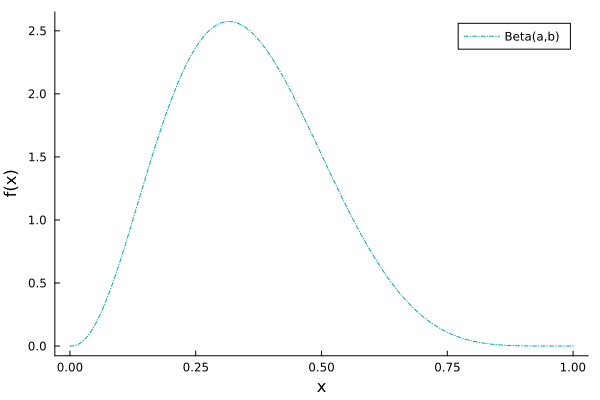

In [5]:
plot(x,L,style = :dashdot,color = 6,label = "Beta(a,b)"
    ,xlabel = "x",ylabel = "f(x)")
plot!(grid = false)

In [6]:
n = 1000
c = 3
G = rand(Uniform(),n)
U = rand(Uniform(),n);

In [7]:
index = []
for i in range(start = 1,stop =length(G),step = 1)
    if  U[i] <(f(G[i],a,b)/(c*pdf(Uniform(),G[i])))
        push!(index,i)
    end
end 

In [8]:
index
X =[G[i] for i in index];

In [9]:
length(X)/length(G)

0.342

In [9]:
histogram(X,normalize = true,bins = 30,color ="green")
plot!(x,L,color = "red",linewidth = 4)
plot!(legend = false)
savefig("accept reject with Uniform")

Now we want to generate random samples from beta distribution that means $g()$ function follow beta distribution.

In [10]:
m = 1000
G1 = rand(Beta(3,6),m)
U1 = rand(Uniform(),m);

In [11]:
index1 = []
for i in range(start = 1,stop = length(G1),step =1)
    if U1[i] < (f(G1[i],a,b)/(c*pdf(Beta(3,6),G1[i])))
        push!(index1,i)
    end
end
X1 = [G1[i] for i in index1];

In [12]:
histogram(X1,normalize = true,ylims = (0,2.6),bins = 50,label = :none)
plot!(x,L,label = :none,color = "red",style = :dot,linewidth = 4)
savefig("accept reject with Beta")

In [14]:
length(X1)/length(G1)

0.341

Genearate  random variables from $\mathcal{N(\mu,\sigma^2)}$. Do this by taking $g(x)$ as Cauchy distribution, and see how it works.

The density function for $\mathcal{N(\mu,\sigma^2)}$ is $\frac{1}{\sqrt2\pi \sigma}e^{\frac{-(x- \mu)^2}{2{\sigma}^2}}, -\infty < x < \infty$ with $\mu  \in \mathbb{R}, \sigma > 0 $ and for Cauchy distribution is $\frac{1}{\pi s}\frac{1}{(1 + (\frac{(x-t)}{s})^2},-\infty < x < \infty$ with $s >0 , t \in \mathbb{R}$.

In [15]:
## we want to generate random samples  from this distributions

mu = 4; sigma = 3;
function h(x,mu,sigma)
    (1/(sqrt(2*pi)*sigma)*exp(-((x-mu)^2)/(2*sigma^2)))
end

h (generic function with 1 method)

####  

since our desire density function has support $(-\infty,\infty)$, so we consider the function $g(.)$ as Cauchy distribution$(0,1)$ as it has the same support.

In [16]:
n = 10000
c = 2 # choose
G = rand(Cauchy(4,3),n)  # here we are taking Standard Cauchy
U = rand(Uniform(),n);


In [17]:
index2 =[]
for i in range(start = 1,stop = length(G),step =1)
    if U[i] < (h(G[i],mu,sigma)/(c*pdf(Cauchy(4,3),G[i])))
        push!(index2,i)
    end
end
X1 = [G[i] for i in index2];

In [18]:
minimum(X1)

-6.300667081719409

In [19]:
x = range(start = -5, stop = 12, length = 1000)
L = [h(i,mu,sigma) for i in x];

In [20]:
using LaTeXStrings

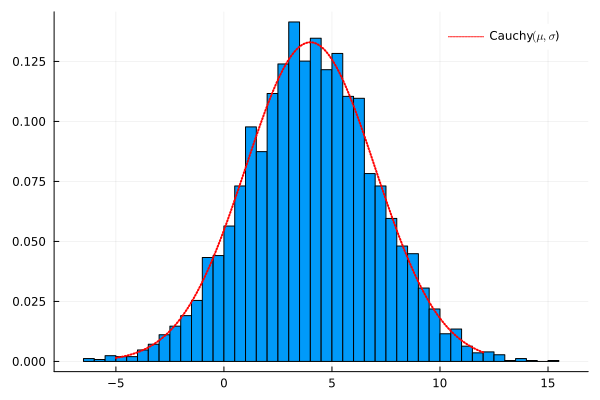

In [21]:
histogram(X1,normalize = true,bins = 50,label = :none)
plot!(x,L,color = :red,linewidth = 2,style = :dot,label  = L"Cauchy$(\mu,\sigma$)",fg_legend = false)